**ASSIGNMENT 2 - Classification Empirical Study: Naïve Bayes vs Logistic Regression**

--------------------------------------------------------------------------

**1. Group Description**

Group Number: 10

Member Name 1: Xiaoxuan Wang

Member Student Number 1: 300133594

Member Name 2: Victor Li

Member Student Number 2: 300146133

--------------------------------------------------------------------------

**Import Libraries**

In [1]:
import pandas
import numpy
import itertools

--------------------------------------------------------------------------

**2. Dataset**

Chosen dataset: Car dataset

The dataset is coming from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/).
It can be retrieved by following [this link](https://archive.ics.uci.edu/dataset/19/car+evaluation).

**Read Dataset**

In [2]:
url = "https://raw.githubusercontent.com/uOttawa-Collabs/CSI4106-Fall-2023/master/Assignment%202/Car/car.data"
dataframe = pandas.read_csv(url)
dataframe.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
dataframe

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


**3. Familiarize with the classification task and the dataset**

***Objective***

The objective of this study is to develop a classification model to evaluate cars based on their configurations and parameters. The dataset comprises six discrete (categorical) feature variables: buying price, maintenance price, number of doors, capacity in terms of persons, the size of the luggage boot, and estimated safety of the car. The target variable is the evaluation of the car, categorized into four classes: unacceptable, acceptable, good, and very good.

***Applications***

1. May assist customers to make informed decisions based on their preferences and constraints, offering valuable insights.
2. May assist car dealership to help assist potential buyers in finding cars that align with their requirements, thereby enhancing customer satisfaction and loyalty.

***Dataset Characteristics Analysis***

****Features****

The dataset used for this study contains information on the following six feature variables:
* Buying Price (`buying`): Indicates the price range at which the car was purchased.
    * Possible values: `vhigh`, `high`, `med`, `low`.
* Maintenance Price (`maint`): Represents the maintenance cost of the car.
    * Possible values: `vhigh`, `high`, `med`, `low`.
* Number of Doors (`doors`): Denotes the number of doors the car has.
    * Possible values: `2`, `3`, `4`, `5more`.
* Capacity (`persons`): Indicates the maximum number of persons the car can accommodate.
    * Possible values: `2`, `4`, `more`.
* Luggage Boot Size (`lug_boot`): Represents the size of the luggage boot in the car.
    * Possible values: `small`, `med`, `big`.
* Estimated Safety (`safety`): Provides an estimation of the safety level of the car.
    * Possible values: `low`, `med`, `high`.

****Classes****

The target variable is Car Evaluation (`class`), which classifies cars into four categories:
unacceptable (`unacc`), acceptable (`acc`), good (`good`), and very good (`vgood`).
These classes serve as the basis for evaluating the overall desirability of a car.

****Training Examples****

The dataset contains 1728 training samples in total. No samples have missing data.

--------------------------------------------------------------------------

**4. Brainstorm about the attributes**

* In the automotive sales market, various factors significantly influence purchasing decisions. Aside from intrinsic attributes provided in the dataset, **features**, **second-hand price**, **power**, **brand**, **color**, and **after-sale service** are essential as well.

  Among the provided attributes in the dataset, the data related to the **number of doors** appears to be less useful, given its correlation with a car's **capacity**. In typical scenarios, a capacity of 2 necessitates a minimum of 2 doors, while a capacity of 4 often results in 4 doors, with a minimum of 2. The relationship between a car's capacity and its doors is evident: larger capacities generally correspond to a higher number of doors. Although it is conceivable that unconventional door numbers, such as odd numbers, might intrigue some customers, it is unlikely that this singular feature significantly influences purchase decisions.

* Based on the diagrams below, it is apparent that each feature exhibits uniformity across all values, mitigating potential biases during model training. Given that all features in this dataset represent discrete values (for instance, the number of persons cannot be fractional), the method of attribute normalization appears inappropriate for this specific dataset.

{'low': 432, 'med': 432, 'high': 432, 'vhigh': 431}


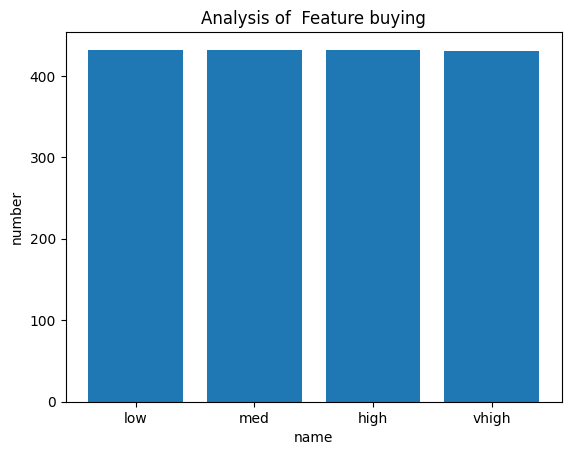

{'low': 432, 'med': 432, 'high': 432, 'vhigh': 431}


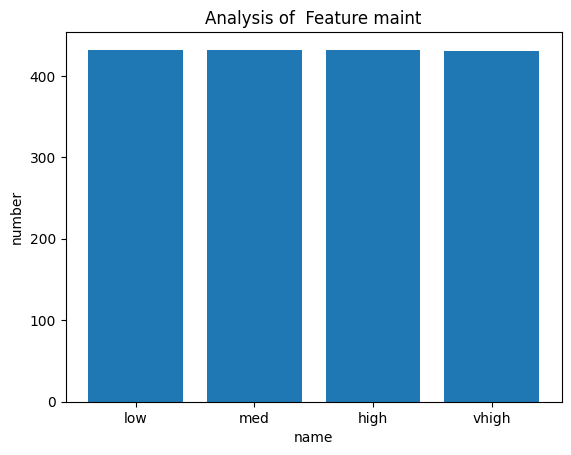

{'2': 431, '3': 432, '4': 432, '5more': 432}


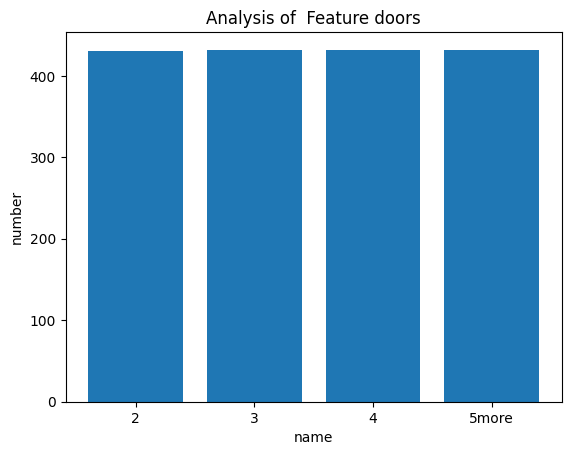

{'2': 575, '4': 576, 'more': 576}


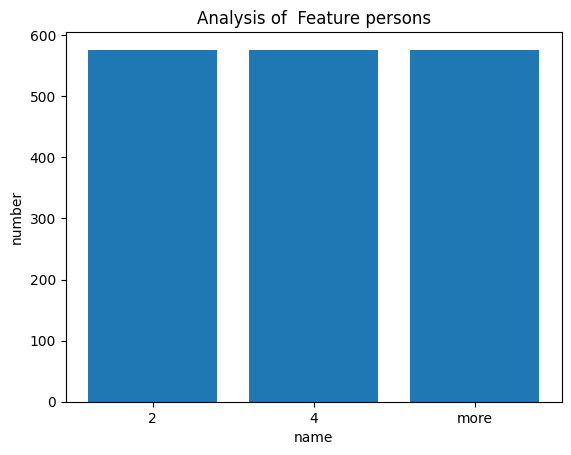

{'small': 575, 'med': 576, 'big': 576}


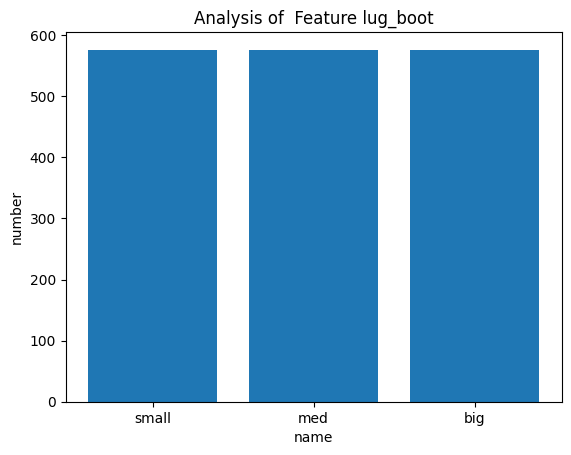

{'low': 575, 'med': 576, 'high': 576}


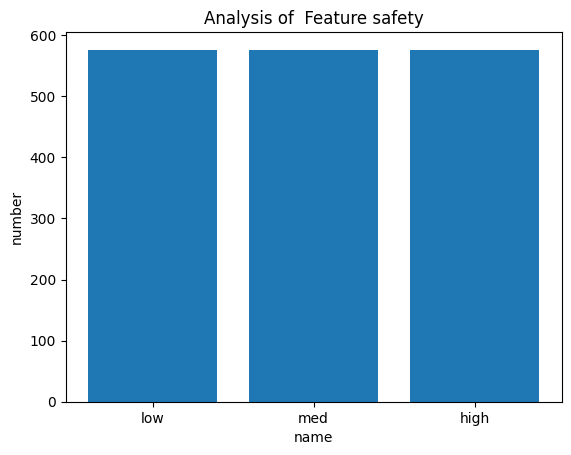

In [3]:
from matplotlib import pyplot as plot

buying_dict = {"low": 0, "med": 0, "high": 0, "vhigh": 0}
maint_dict = {"low": 0, "med": 0, "high": 0, "vhigh": 0}
door_dict = {"2": 0, "3": 0, "4": 0, "5more": 0}
persons_dict = {"2": 0, "4": 0, "more": 0}
lug_dict = {"small": 0, "med": 0, "big": 0}
safety_dict = {"low": 0, "med": 0, "high": 0}

def analyze_data(dataframe, prop, dic):
    data = dataframe[prop]
    for row in data:
        dic[row] += 1
    generate_diagram(dic, prop)

def generate_diagram(dic: dict, name):
    print(dic)
    x_list = []
    y_list = []
    for i in dic.keys():
        x_list.append(i)
        y_list.append(dic[i])
    plot.bar(x_list, y_list)
    plot.title("Analysis of " + " Feature " + name)
    plot.xlabel("name")
    plot.ylabel("number")
    plot.show()


analyze_data(dataframe, "buying", buying_dict)
analyze_data(dataframe, "maint", maint_dict)
analyze_data(dataframe, "doors", door_dict)
analyze_data(dataframe, "persons", persons_dict)
analyze_data(dataframe, "lug_boot", lug_dict)
analyze_data(dataframe, "safety", safety_dict)

--------------------------------------------------------------------------

**5. Encode the features**

* The data source that was chosen is using discrete variables for all features. It natively fits into the Categorical Naive Bayes Model (`CategoricalNB`). We just need to label them with integers.
* For Logistic Regression, one-hot encoding enables the conversion to continuous variables for all features.

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

feature_columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
class_column = "class"

# Performing label encoding for features
dataframe_label_feature = pandas.DataFrame().reindex_like(dataframe[feature_columns])
label_encoder_dict = {}
for column in feature_columns:
    label_encoder = LabelEncoder()
    dataframe_label_feature[column] = label_encoder.fit_transform(dataframe[column])
    label_encoder_dict[column] = label_encoder

# Performing one-hot encoding for features
onehot_encoder_feature = OneHotEncoder(sparse_output=False)
matrix_onehot_feature = onehot_encoder_feature.fit_transform(dataframe[feature_columns])
dataframe_onehot_feature = pandas.DataFrame(
    matrix_onehot_feature,
    columns=onehot_encoder_feature.get_feature_names_out()
)

# Performing label encoding for classes
label_encoder_class = LabelEncoder()
vector_label_class = label_encoder_class.fit_transform(dataframe[class_column])
dataframe_label_class = pandas.DataFrame(vector_label_class, columns=["class"])

--------------------------------------------------------------------------

**6. Define 2 models using default parameters**


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB

default_naive_bayes_classifier = CategoricalNB()
default_logistic_regression_classifier = LogisticRegression()

--------------------------------------------------------------------------

**7. Train/test/evaluate the 2 models in cross-validation**

***Initialize KFold Cross Validator***

Here we are initializing the `KFold` validator. Explanation of parameters:
* `n_splits=4` means we are using 4-fold validation.
* `shuffle=True` means data will be shuffled before spliting to batches.
* `random_state` is the random seed used for shuffling. Here we are using a fixed number to keep reproducibility.

In [6]:
from sklearn.model_selection import KFold
four_fold = KFold(n_splits=4, shuffle=True, random_state=4106)

***Training and Evaluating the Model***

****Utility Functions****

In [8]:
from sklearn.metrics import precision_score, recall_score
def train_and_evaluate(model, validator, dataframe_training, series_validating):
    micro_precision_scores = []
    macro_precision_scores = []
    micro_recall_scores = []
    macro_recall_scores = []
    
    X = dataframe_training
    y = series_validating

    # Split the dataset into training set and testing set with validator
    for train_index, test_index in validator.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        # Train the model
        model.fit(X_train, y_train)
    
        # Make predictions ŷ
        y_hat = model.predict(X_test)
        
        # Calculate precision and recall for micro and macro averages
        micro_precision = precision_score(y_test, y_hat, average="micro", zero_division=0)
        macro_precision = precision_score(y_test, y_hat, average="macro", zero_division=0)
        micro_recall = recall_score(y_test, y_hat, average="micro", zero_division=0)
        macro_recall = recall_score(y_test, y_hat, average="macro", zero_division=0)

        # Append scores to lists
        if micro_precision != 0:
            micro_precision_scores.append(micro_precision)
        if macro_precision != 0:
            macro_precision_scores.append(macro_precision)
        if micro_recall != 0:
            micro_recall_scores.append(micro_recall)
        if macro_recall != 0:
            macro_recall_scores.append(macro_recall)

    # Calculate average precision and recall scores for micro and macro averages
    return (
        average(micro_precision_scores),
        average(macro_precision_scores),
        average(micro_recall_scores),
        average(macro_recall_scores)
    )


def average(numeric_list):
    return sum(numeric_list) / len(numeric_list)


def print_result(
    average_micro_precision,
    average_macro_precision,
    average_micro_recall, 
    average_macro_recall
):
    print("Average Micro Precision: {:.2f}".format(average_micro_precision))
    print("Average Macro Precision: {:.2f}".format(average_macro_precision))
    print("Average Micro Recall: {:.2f}".format(average_micro_recall))
    print("Average Macro Recall: {:.2f}".format(average_macro_recall))

****Naive Bayes****

In [9]:
print_result(
    *train_and_evaluate(
        default_naive_bayes_classifier,
        four_fold,
        dataframe_label_feature,
        dataframe_label_class["class"]
    )
)

Average Micro Precision: 0.85
Average Macro Precision: 0.80
Average Micro Recall: 0.85
Average Macro Recall: 0.58


****Logistic Regression****

In [10]:
print_result(
    *train_and_evaluate(
        default_logistic_regression_classifier,
        four_fold, dataframe_onehot_feature,
        dataframe_label_class["class"]
    )
)

Average Micro Precision: 0.91
Average Macro Precision: 0.83
Average Micro Recall: 0.91
Average Macro Recall: 0.77


--------------------------------------------------------------------------

**8. Train/test/evaluate the 2 models in cross-validation with modified parameters (#1)**

Trying to change smoothing parameter `alpha` parameter for the Naive Bayes classifier.

The smoothing parameter is used to handle the problem of zero probabilities.
* In the context of Naive Bayes, it refers to the issue where a feature in the test data has a probability of zero for a particular class because that feature did not appear in the training data for that class, which can cause the entire predicted probability for that class to be zero.
* To solve this problem, a small positive value (alpha) is added to the *count* of each feature when calculating the conditional probabilities.

In [11]:
alpha_naive_bayes_classifier_1 = CategoricalNB(alpha=0.3)
print("Naive Bayes with alpha = 0.3:")
print_result(
    *train_and_evaluate(
        alpha_naive_bayes_classifier_1,
        four_fold,
        dataframe_label_feature,
        dataframe_label_class["class"]
    )
)

print()
alpha_naive_bayes_classifier_2 = CategoricalNB(alpha=0.7)
print("Naive Bayes with alpha = 0.7:")
print_result(
    *train_and_evaluate(
        alpha_naive_bayes_classifier_2,
        four_fold,
        dataframe_label_feature,
        dataframe_label_class["class"]
    )
)

Naive Bayes with alpha = 0.3:
Average Micro Precision: 0.85
Average Macro Precision: 0.81
Average Micro Recall: 0.85
Average Macro Recall: 0.61

Naive Bayes with alpha = 0.7:
Average Micro Precision: 0.85
Average Macro Precision: 0.81
Average Micro Recall: 0.85
Average Macro Recall: 0.59


--------------------------------------------------------------------------

**9. Train/test/evaluate the 2 models in cross-validation with modified parameters (#2)**

Modify the different types of solver in the logistic regression classifier. We chose two solvers for this comparison: `newton-cholesky` and `liblinear`.

In [12]:
newton_logistic_regression_classifier = LogisticRegression(solver = "newton-cholesky")
print("Newton-Cholesky Result:")
print_result(
    *train_and_evaluate(
        newton_logistic_regression_classifier,
        four_fold,
        dataframe_onehot_feature,
        dataframe_label_class["class"]
    )
) 

Newton-Cholesky Result:
Average Micro Precision: 0.88
Average Macro Precision: 0.82
Average Micro Recall: 0.88
Average Macro Recall: 0.62


In [13]:
liblinear_regression_classifier = LogisticRegression(solver = "liblinear")
print("liblinear Result:")
print_result(
    *train_and_evaluate(
        liblinear_regression_classifier,
        four_fold,
        dataframe_onehot_feature,
        dataframe_label_class["class"]
    )
)

liblinear Result:
Average Micro Precision: 0.88
Average Macro Precision: 0.76
Average Micro Recall: 0.88
Average Macro Recall: 0.60


**10. Train/test/evaluate the 2 models in cross-validation with modified parameters (#3)**

Modify the tolerance parameter in the in the logistic regression classifier.

The tolerance parameter determines the stopping criteria. The algorithm stops when the change in the loss function (or cost function) between iterations is smaller than the value.

In [15]:
for tol in (1e-2, 1e-15):
    tol_regression_classifer = LogisticRegression(tol=tol)
    print(f"Regression classifer with tol = {tol}:")
    print_result(
        *train_and_evaluate(
            tol_regression_classifer,
            four_fold,
            dataframe_onehot_feature,
            dataframe_label_class["class"]
        )
    )
    print()

Regression classifer with tol = 0.01:
Average Micro Precision: 0.91
Average Macro Precision: 0.83
Average Micro Recall: 0.91
Average Macro Recall: 0.77

Regression classifer with tol = 1e-15:
Average Micro Precision: 0.91
Average Macro Precision: 0.83
Average Micro Recall: 0.91
Average Macro Recall: 0.77



**11. Train/test/evaluate the 2 models in cross-validation with modified parameters (#4)**

Modify the `fit_prior` parameter in the in the Naive Bayes classifier.

By default, the classifier will calculate the prior probabilities of each class based on the relative frequency of each class in the training data.

When `fit_prior` is set to `False`, the classifier will assume a uniform prior, meaning that it treats all classes equally likely.

In [16]:
new_naive_bayes_classifier = CategoricalNB(fit_prior=False)
print("Result of Naive Bayes with uniform prior:")
print_result(
    *train_and_evaluate(
        new_naive_bayes_classifier,
        four_fold,
        dataframe_label_feature,
        dataframe_label_class["class"]
    )
)
print()

Result of Naive Bayes with uniform prior:
Average Micro Precision: 0.80
Average Macro Precision: 0.66
Average Micro Recall: 0.80
Average Macro Recall: 0.87



--------------------------------------------------------------------------

**12. Analyze the obtained results**


We chose alpha parameter in Naive Bayes model and solver parameter to make an comparison analysis.

According to the comparison chart below, the Naive Bayes model with 0.3 alpha value provided the best accuracies in all aspects, which there is a significant improvement in the percentage of the Macro Recall. When the alpha is 0.7, the improvement is slight. The smoothing parameter is used to handle the feature that did not be found during the training. In our dataset, since the quantities of all features are really balanced based on the result of the "Brain Storm" section. Therefore the model with a smaller value of alpha can provide a better result.

In the Logistic Regression model, Newton-Cholesky solver returned better accuracies in all aspects. It is because the newton-cholesky solver does well for dataset which the number of samples is larger than the number of features, and "the Encode the features" section has proved. The liblinear also has a slighter improvement while the Macro Precision result is worse than default. It proves that the liblinear does well in the small dataset but is not good enough in our dataset.

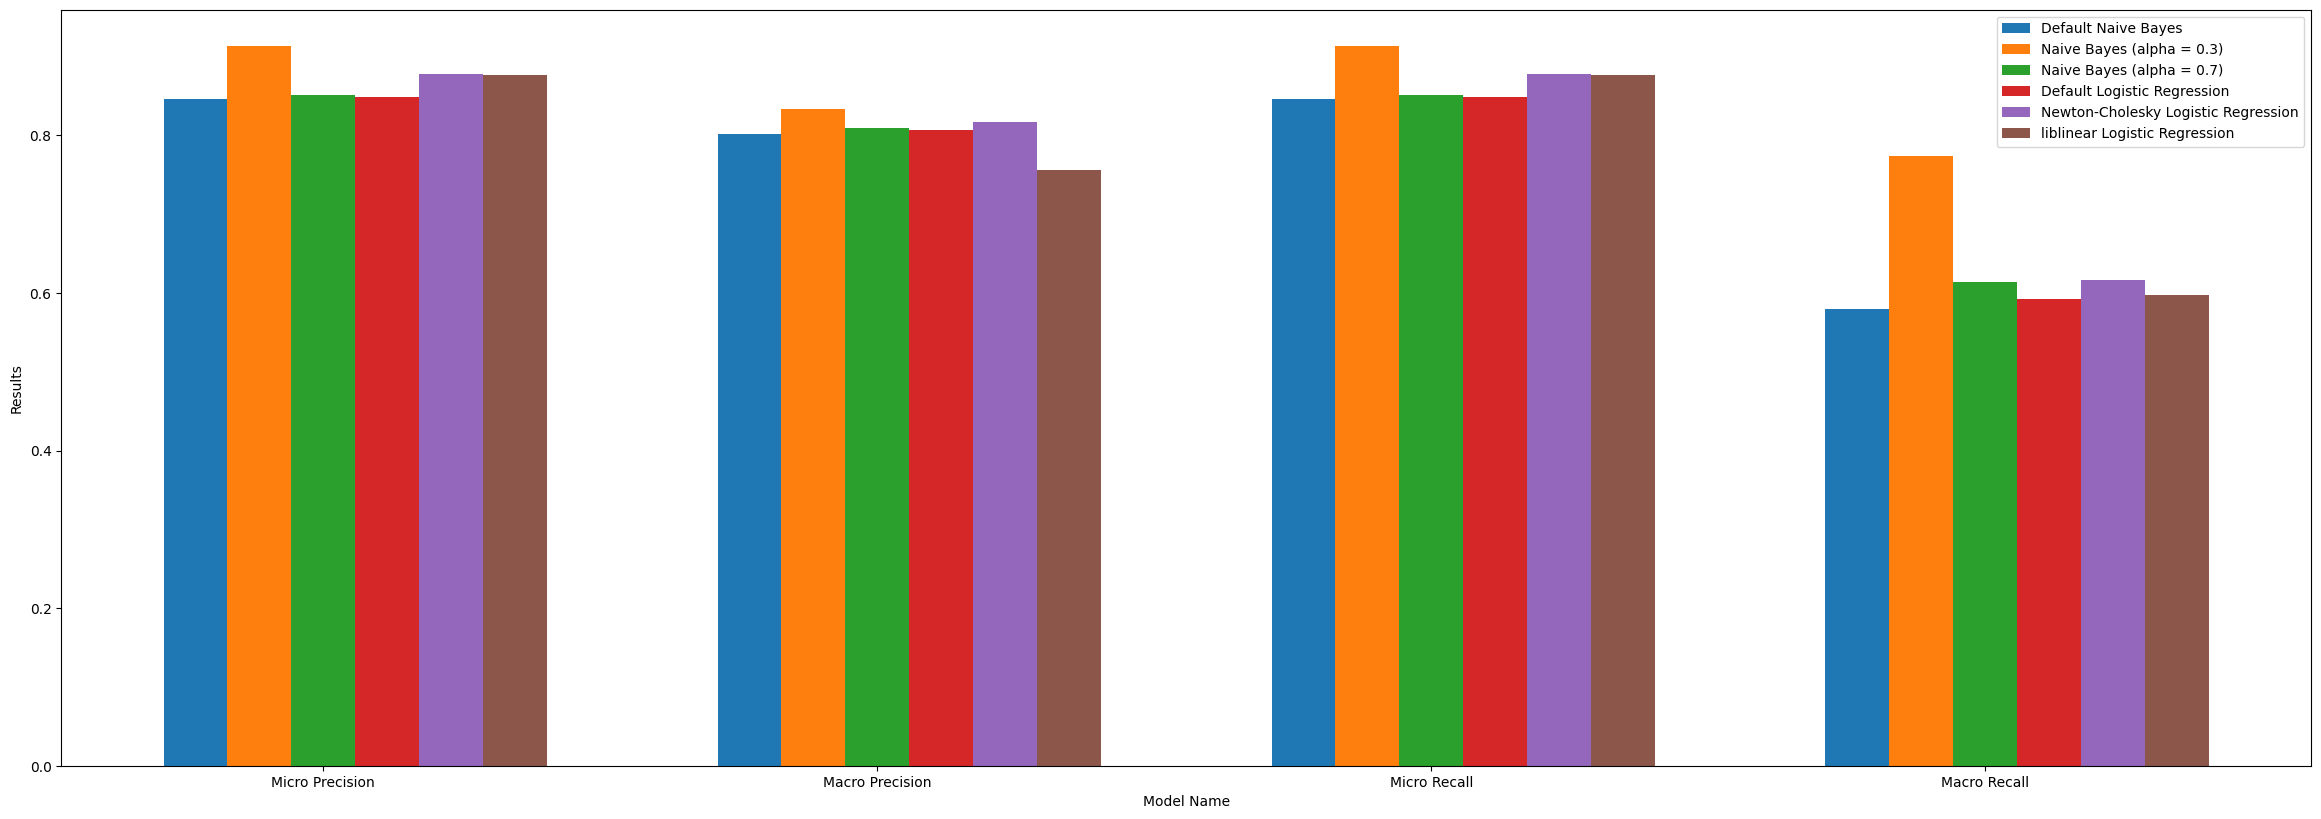

In [17]:
# Naive Bayes
name_list = ["Default Naive Bayes", "Naive Bayes (alpha = 0.3)", "Naive Bayes (alpha = 0.7)",
            "Default Logistic Regression", "Newton-Cholesky Logistic Regression", "liblinear Logistic Regression"]

x_label = ["Micro Precision", "Macro Precision", "Micro Recall", "Macro Recall"]

result_list = []
result_list.append(train_and_evaluate(default_naive_bayes_classifier, four_fold, dataframe_label_feature, dataframe_label_class["class"]))
result_list.append(train_and_evaluate(default_logistic_regression_classifier, four_fold, dataframe_onehot_feature, dataframe_label_class["class"]))
result_list.append(train_and_evaluate(alpha_naive_bayes_classifier_1, four_fold, dataframe_label_feature, dataframe_label_class["class"]))
result_list.append(train_and_evaluate(alpha_naive_bayes_classifier_2, four_fold, dataframe_label_feature, dataframe_label_class["class"]))
result_list.append(train_and_evaluate(newton_logistic_regression_classifier, four_fold, dataframe_onehot_feature, dataframe_label_class["class"]))
result_list.append(train_and_evaluate(liblinear_regression_classifier, four_fold, dataframe_onehot_feature, dataframe_label_class["class"]))

width = 0.3
x_list = [0.2, 2.8, 5.4, 8]
plot.figure(figsize=(12, 4))
for i in range(6):
    plot.bar(x_list, result_list[i], width=0.3, tick_label = x_label, label=name_list[i]) if i==2 else plot.bar(x_list, result_list[i], width=0.3, label=name_list[i])

    for k in range(len(x_list)):
        x_list[k] = x_list[k] + width
plot.subplots_adjust(right=2, top=2)
plot.xlabel("Model Name")
plot.ylabel("Results")
plot.legend()
plot.show()

--------------------------------------------------------------------------

**13. Conclusion**

In this empirical study, we explored a classification task aiming to predict class labels for instances using two models: Logistic Regression and Naive Bayes. Through feature analysis and engineering, we ensured the relevance of attributes for the classification task.

By employing 4-fold cross-validation, we evaluated the models using precision and recall measures by comparing both micro and macro averages. Through some parameter modifications in two experiments for each model, we explored the impact on model performance.

The results revealed nuanced differences in model performance based on parameter variations. These differences, observed in precision and recall metrics, were analyzed with a comparative plot, from which we can see, the Naive Bayes model with alpha value set to 0.3 renders the most optimal result.

--------------------------------------------------------------------------

**14. References**

[1]	F. Pedregosa et al., ‘Scikit-learn: Machine Learning in Python’, Journal of Machine Learning Research, vol. 12, pp. 2825–2830, 2011.

[2]	L. Buitinck et al., ‘API design for machine learning software: experiences from the scikit-learn project’, in ECML PKDD Workshop: Languages for Data Mining and Machine Learning, 2013, pp. 108–122.
References

[3] M. Bohanec, 'Car Evaluation'. UCI Machine Learning Repository, 1988. doi:10.24432/C5JP48